#Financial Inclusion

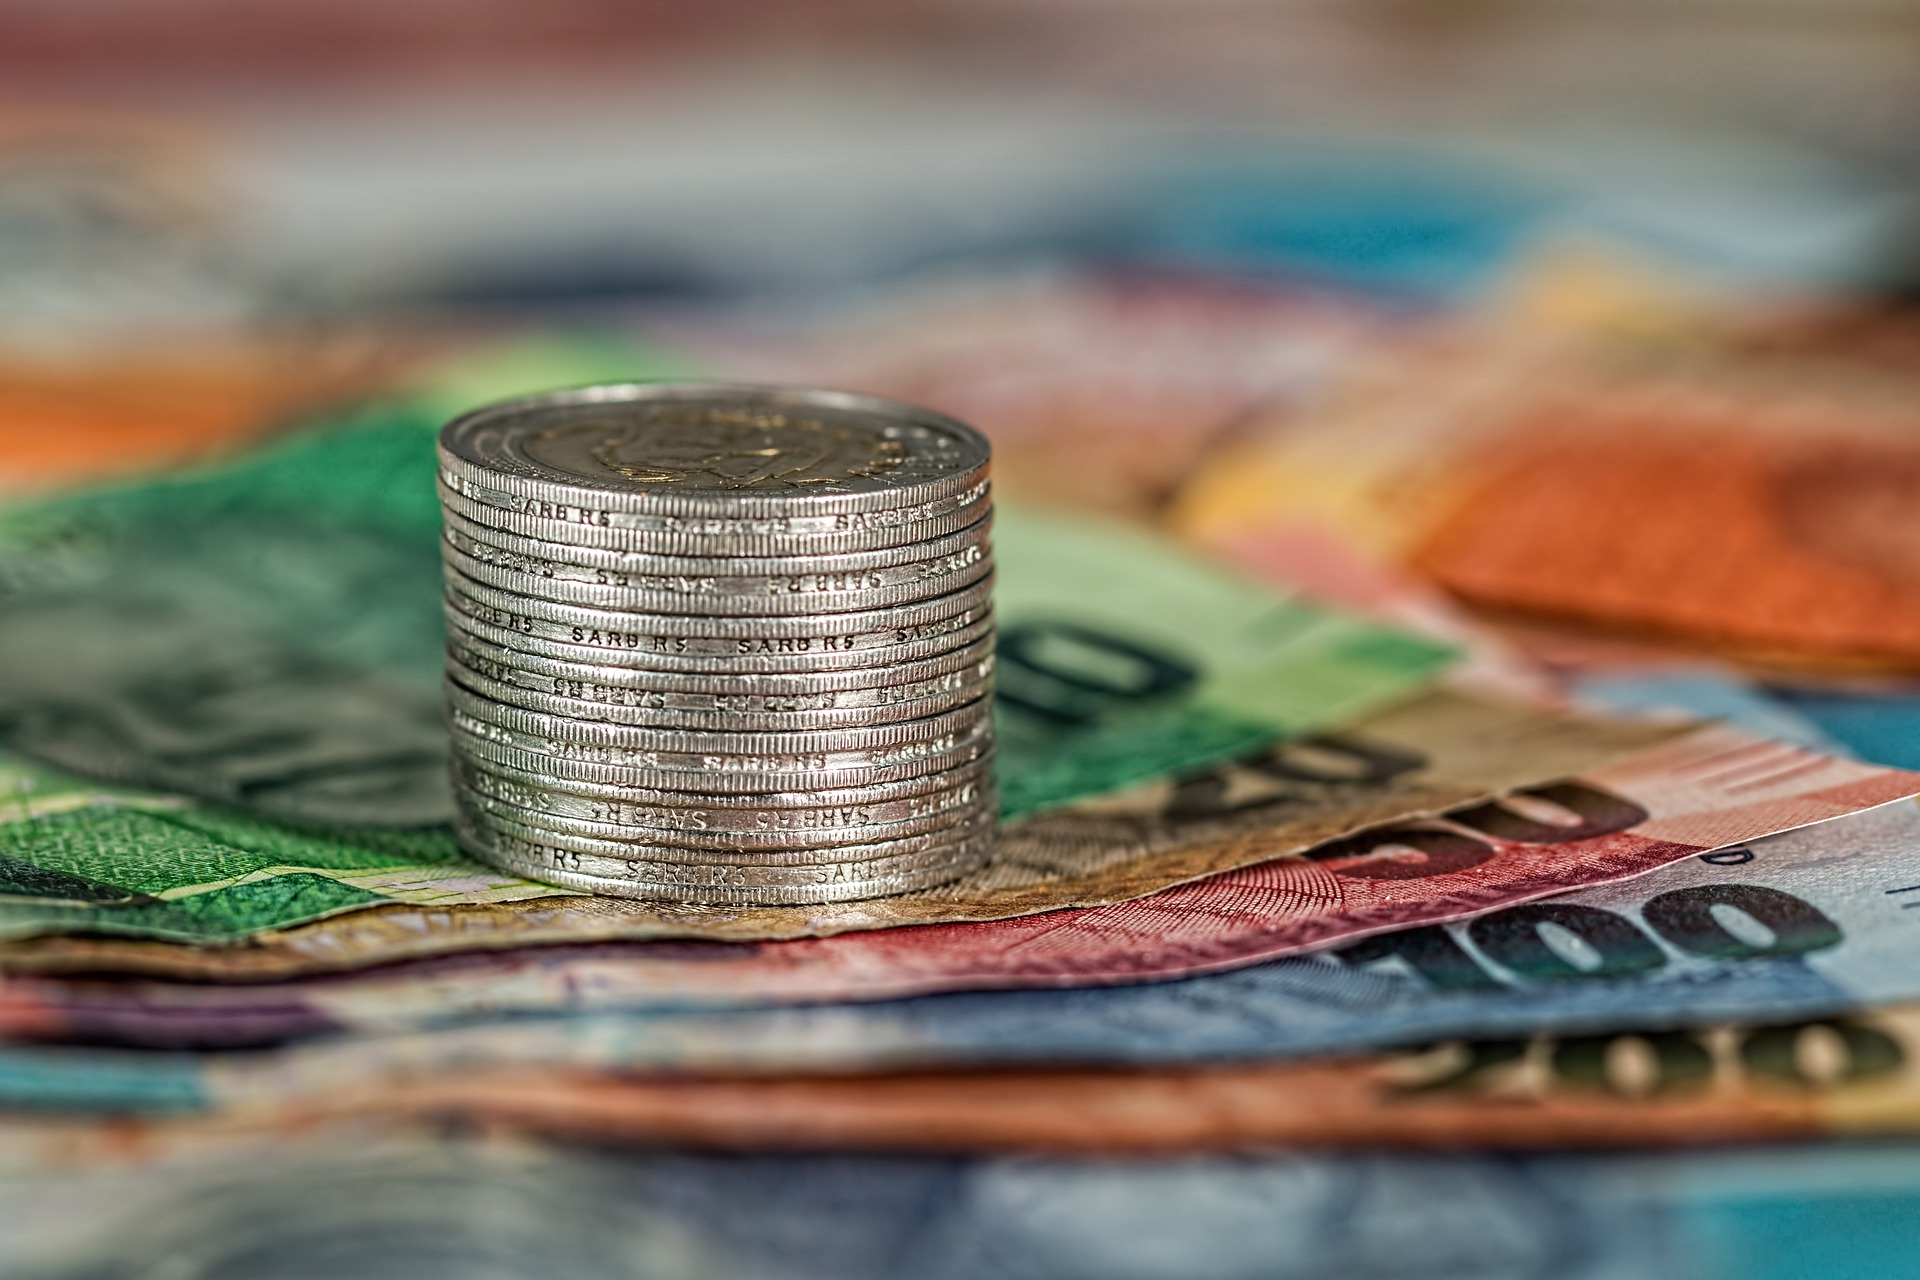

In [1]:
# Packages
import pandas as pd
import numpy as np

In [2]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = '/content/drive/MyDrive/financial-inclusion-in-africa.zip'
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
StarterNotebook.ipynb                          2021-12-02 19:53:34        98482
Train.csv                                      2021-12-02 19:53:34      2864060
Test.csv                                       2021-12-02 19:53:34      1201313
VariableDefinitions.csv                        2021-12-02 19:53:34         1156
SampleSubmission.csv                           2021-12-02 19:53:34       848575
Extracting all the files now...
Done!


In [3]:
# The training data set
train_df = pd.read_csv("Train.csv")
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# The test set data
test_df = pd.read_csv("Test.csv")
test_df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
# data structure
train_df.shape

(23524, 13)

In [6]:
#Descriptives
train_df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Data has only 3 numeric datasets which are year, household size and the age of the respondent. It would be perhaps ideal to look at scaling the data for the columns except for the year variable 

In [7]:
# Missing values
train_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

There are no missing values which is a good thing.

# EDA

What is the distribution of the bank ownership?

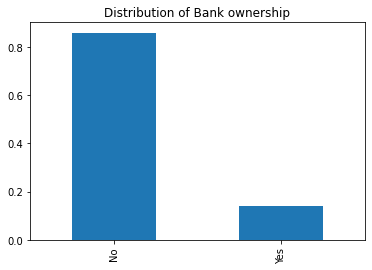

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

train_df['bank_account'].value_counts(normalize = True).plot(
    kind = 'bar',
    x = 'Bank Account',
    y = 'Percentage',
    title = 'Distribution of Bank ownership'
);

The target variable has an class imbalance, where most respondents (85%) have no bank accounts. 

In [9]:
# Age vs Bank account
fig = px.histogram(train_df, 
                   x= "age_of_respondent", 
                   color = 'bank_account')

fig.update_layout(xaxis_title = 'Age', 
                  yaxis_title = 'Frequency',
                  title = "Age vs Bank account")
fig.show()

The age distribution for those with or without bank accounts are almost similar

In [10]:
# Cell phone Access vs Bank account
fig = px.histogram(train_df, 
                   x= "cellphone_access", 
                   color = 'bank_account')

fig.update_layout(xaxis_title = 'Cell phone Access', 
                  yaxis_title = 'Frequency',
                  title = "Cell phone Access vs Bank account")
fig.show()

Those without cellphone access have almost no bank accounts

In [11]:
# Hosehold Size vs Bank account
fig = px.histogram(train_df, 
                   x= "household_size", 
                   color = 'bank_account')

fig.update_layout(xaxis_title = 'Hosehold sze', 
                  yaxis_title = 'Frequency',
                  title = "Hosehold Size vs Bank account")
fig.show()

In [12]:
# Country vs Bank account
fig = px.histogram(train_df, 
                   x= "country", 
                   color = 'bank_account')

fig.update_layout(xaxis_title = 'Country', 
                  yaxis_title = 'Frequency',
                  title = "Country vs Bank account")
fig.show()

Most respondents are from Rwanda and the least are Ugandans


In [13]:
# Country vs Bank account
fig = px.histogram(train_df, 
                   x= "location_type", 
                   color = 'bank_account')

fig.update_layout(xaxis_title = 'Location', 
                  yaxis_title = 'Frequency',
                  title = "Location vs Bank account")
fig.show()

# Building the model

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

## Base Model

In [15]:
# Recording the Bank account variable 
account_dict = {
    "Yes" : 1,
    "No": 0
}

train_df['account'] = (
    train_df['bank_account']
    .replace(account_dict)
)
train_df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,account
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,0
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,0
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,0
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,0


In [16]:
y = train_df['account']
X = train_df.drop(columns = ['year', 'uniqueid', 'bank_account', 'account'], axis = 1 )

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state =42
)



In [17]:
X_train.head()

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
12033,Rwanda,Urban,Yes,7,18,Female,Other non-relatives,Single/Never Married,Primary education,Informally employed
11888,Rwanda,Rural,Yes,3,49,Female,Spouse,Married/Living together,Secondary education,Informally employed
20909,Tanzania,Urban,Yes,2,41,Male,Head of Household,Single/Never Married,Primary education,Informally employed
22785,Uganda,Rural,No,5,25,Female,Spouse,Married/Living together,Primary education,Other Income
14323,Rwanda,Rural,Yes,7,46,Male,Head of Household,Married/Living together,Primary education,Informally employed


In [18]:
y_train.head()

12033    0
11888    0
20909    0
22785    0
14323    0
Name: account, dtype: int64

In [19]:
acc_baseline = y_train.value_counts(normalize= True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.86


In [20]:
# Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [21]:
# Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [22]:
# Fitting the models

model_reg = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model_reg.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [23]:
# Fitting the Over sample models

model_reg_over = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model_reg_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [24]:
# Fitting the Under sample models

model_reg_under = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model_reg_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [25]:
print("The MAE is:", mean_absolute_error(y_train, model_reg.predict(X_train)))
print("The MAE when oversampling is:", mean_absolute_error(y_train_over, model_reg_over.predict(X_train_over)))
print("The MAE when undersampling is:", mean_absolute_error(y_train_under, model_reg.predict(X_train_under)))

The MAE is: 0.11477761836441894
The MAE when oversampling is: 0.22803269552294259
The MAE when undersampling is: 0.3408239700374532


In [26]:
print("The MAE is:", mean_absolute_error(y_test, model_reg.predict(X_test)))

The MAE is: 0.11392136025504782


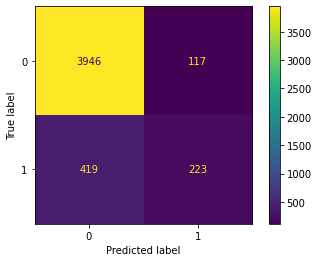

In [27]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model_reg,
    X_test,
    y_test
);

## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Define Parammeters to be tuned
paramms = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "logisticregression__C" : [100, 10, 1.0, 0.1, 0.01]
}

In [30]:
# Grid Search
model = GridSearchCV(
    model_reg,
    param_grid = paramms,
    n_jobs = -1,
    cv = 5,
    verbose =1
)

model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['country',
                                                            'location_type',
                                                            'cellphone_access',
                                                            'gender_of_respondent',
                                                            'relationship_with_head',
                                                            'marital_status',
                                                            'education_level',
                                                            'job_type'],
                                                      use_cat_names=True)),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
   

In [31]:
# Put in a data frame
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.456784,0.025478,0.000000,0.000000,100,l1,newton-cg,"{'logisticregression__C': 100, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
1,0.732971,0.160428,0.000000,0.000000,100,l1,lbfgs,"{'logisticregression__C': 100, 'logisticregres...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,1.068923,0.158863,0.128428,0.044483,100,l1,liblinear,"{'logisticregression__C': 100, 'logisticregres...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4
3,1.379040,0.118586,0.108432,0.028113,100,l2,newton-cg,"{'logisticregression__C': 100, 'logisticregres...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4
4,0.995578,0.216892,0.117932,0.034489,100,l2,lbfgs,"{'logisticregression__C': 100, 'logisticregres...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4
5,1.174301,0.185137,0.126830,0.024078,100,l2,liblinear,"{'logisticregression__C': 100, 'logisticregres...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4
6,0.751546,0.084607,0.000000,0.000000,10,l1,newton-cg,"{'logisticregression__C': 10, 'logisticregress...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
7,0.804428,0.104042,0.000000,0.000000,10,l1,lbfgs,"{'logisticregression__C': 10, 'logisticregress...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
8,1.820103,0.783601,0.155162,0.028509,10,l1,liblinear,"{'logisticregression__C': 10, 'logisticregress...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4
9,1.342911,0.235792,0.137890,0.026568,10,l2,newton-cg,"{'logisticregression__C': 10, 'logisticregress...",0.883103,0.881775,0.887885,0.880978,0.889450,0.884638,0.003396,4


In [32]:
print("The MAE in the train set is:", mean_absolute_error(y_train, model_reg.predict(X_train)))
print("The MAE in the test set is:", mean_absolute_error(y_test, model_reg.predict(X_test)))
print("The HyperTuned model MAE in the train set is:", mean_absolute_error(y_train, model.predict(X_train)))
print("The HyperTuned model MAE in the test set is:", mean_absolute_error(y_test, model.predict(X_test)))

The MAE in the train set is: 0.11477761836441894
The MAE in the test set is: 0.11392136025504782
The HyperTuned model MAE in the train set is: 0.1149370317232584
The HyperTuned model MAE in the test set is: 0.1132837407013815


In [33]:
# The best model
model.best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000,
                                    solver='newton-cg'))])

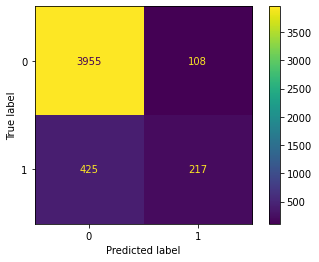

In [34]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test
);

## Generate Insights

In [35]:
features = model_reg.named_steps['onehotencoder'].get_feature_names()
importances = model_reg.named_steps['logisticregression'].coef_[0]

odds_ratios = pd.Series(np.exp(importances),
                        index= features).sort_values()

odds_ratios.tail()

country_Kenya                                      1.312040
education_level_Vocational/Specialised training    1.344698
job_type_Formally employed Private                 1.358403
cellphone_access_Yes                               1.478852
education_level_Tertiary education                 1.544953
dtype: float64

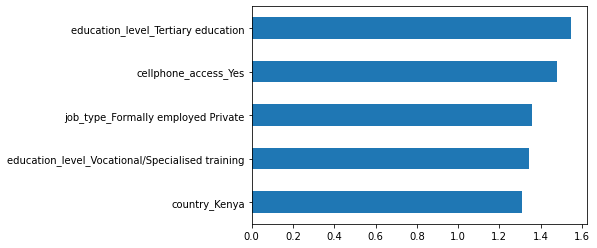

In [36]:
# Variables with highest Odds
odds_ratios.tail().plot(kind='barh');

In [37]:
odds_ratios.head()

education_level_No formal education    0.643721
cellphone_access_No                    0.676200
country_Tanzania                       0.768852
country_Uganda                         0.793492
job_type_Informally employed           0.807912
dtype: float64

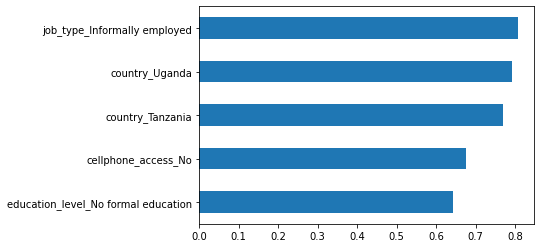

In [38]:
# Variables with lowest Odds
odds_ratios.head().plot(kind='barh');

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [40]:
# Fitting a DT
model_dt = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state =42)
)

model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'location_type',
                                      'cellphone_access',
                                      'gender_of_respondent',
                                      'relationship_with_head',
                                      'marital_status', 'education_level',
                                      'job_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': Rwanda      1
Tanzania    2
Uganda      3
Kenya       4
NaN        -2
dtype: int64},
                                         {'col': 'location_type',
                                          'data_type': dtype('O'),
                                          'ma...
Other/Dont know/RTA                6
NaN                               -2
dtype: int64},
                                         {'col': 'job

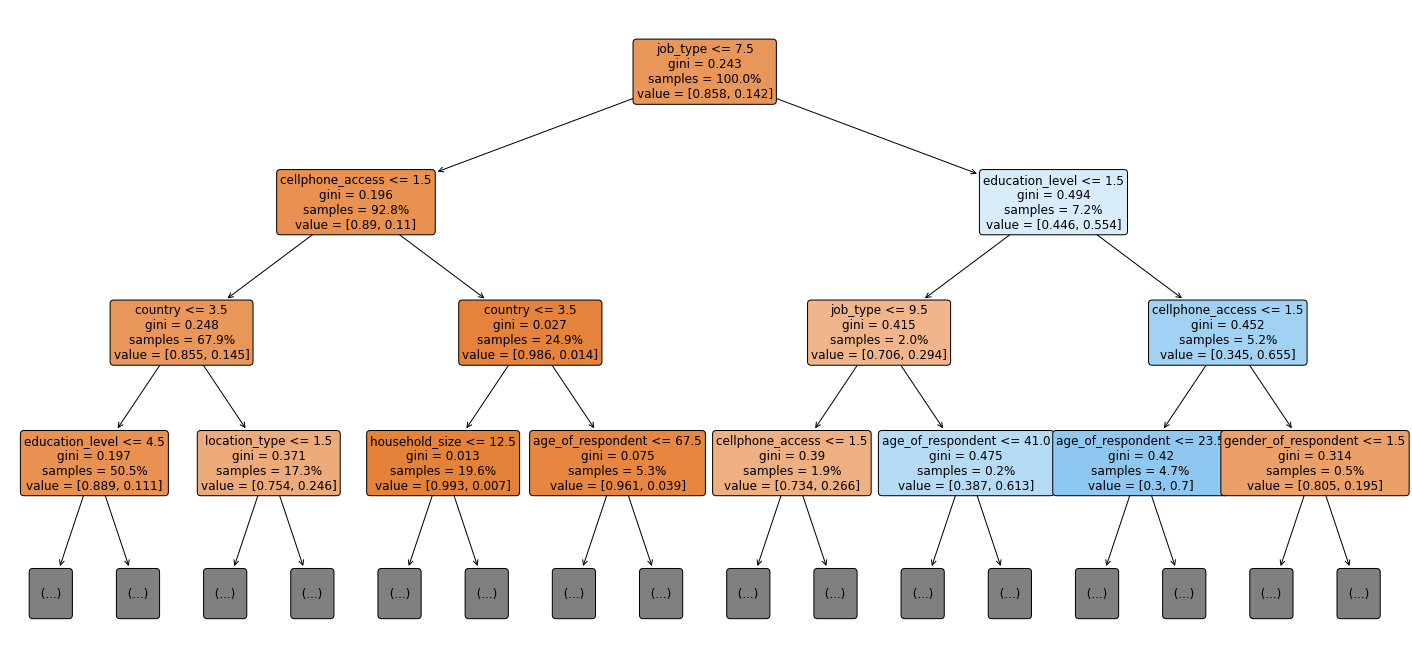

In [41]:
# Plot
fig, ax = plt.subplots(figsize= (25,12))
plot_tree(
    decision_tree= model_dt.named_steps['decisiontreeclassifier'],
    feature_names = X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [42]:
# Depth Hyper parameters
depth_hyperparams = range(1, 50, 2)

# Create empty lists for training and validation accuracy scores
training_acc = []
testing_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    train_model = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth =d, random_state = 42)
    )

    # Fit model to training data
    train_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(train_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    testing_acc.append(train_model.score(X_test, y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.8658802274297253, 0.877411127052447, 0.8809182209469153]
Testing Accuracy Scores: [0.8650371944739639, 0.8788522848034006, 0.8826780021253985]


In [43]:
# Depth Hyper parameters
depth_hyperparams = range(1, 50, 2)

# Create empty lists for training and validation accuracy scores
training_mae = []
testing_mae = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    train_model = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth =d, random_state = 42)
    )

    # Fit model to training data
    train_model.fit(X_train, y_train)
    # Calculate training mae score and append to `training_mae`
    training_mae.append(mean_absolute_error(y_train, train_model.predict(X_train)))
    # Calculate validation mae score and append to `testing_mae`
    testing_mae.append(mean_absolute_error(y_test, train_model.predict(X_test)))

print("Training MAE Scores:", training_mae[:3])
print("Testing MAE Scores:", testing_mae[:3])

Training MAE Scores: [0.13411977257027471, 0.12258887294755301, 0.11908177905308465]
Testing MAE Scores: [0.13496280552603612, 0.12114771519659936, 0.11732199787460149]


## HyperTuning the Decision Tree

In [44]:
# Define Parammeters to be tuned
paramms = {
    "decisiontreeclassifier__criterion": ['gini', 'entropy'],
    "decisiontreeclassifier__max_depth": range(1, 50, 5),
    "decisiontreeclassifier__min_samples_split" : range(1, 10)
}

In [45]:
# Grid Search
model_dt_tune = GridSearchCV(
    model_dt,
    param_grid = paramms,
    n_jobs = -1,
    cv = 5,
    verbose =1
)

model_dt_tune.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


100 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-package

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['country',
                                                             'location_type',
                                                             'cellphone_access',
                                                             'gender_of_respondent',
                                                             'relationship_with_head',
                                                             'marital_status',
                                                             'education_level',
                                                             'job_type'],
                                                       mapping=[{'col': 'country',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Rwanda      1
Tanzania    2
Uganda    

In [46]:
# Put in a data frame
cv_results_dt = pd.DataFrame(model_dt_tune.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.259939,0.010650,0.000000,0.000000,gini,1,1,"{'decisiontreeclassifier__criterion': 'gini', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,180
1,0.275273,0.013022,0.038481,0.005440,gini,1,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.868757,0.868225,0.866100,0.857333,0.868988,0.865880,0.004394,33
2,0.256342,0.016564,0.038731,0.004941,gini,1,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.868757,0.868225,0.866100,0.857333,0.868988,0.865880,0.004394,33
3,0.253363,0.014101,0.034927,0.000428,gini,1,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.868757,0.868225,0.866100,0.857333,0.868988,0.865880,0.004394,33
4,0.262208,0.016551,0.036228,0.001311,gini,1,5,"{'decisiontreeclassifier__criterion': 'gini', ...",0.868757,0.868225,0.866100,0.857333,0.868988,0.865880,0.004394,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.311425,0.014067,0.037493,0.002683,entropy,46,5,{'decisiontreeclassifier__criterion': 'entropy...,0.844049,0.848034,0.849894,0.838735,0.844539,0.845050,0.003834,130
176,0.314052,0.019242,0.039858,0.005847,entropy,46,6,{'decisiontreeclassifier__criterion': 'entropy...,0.842721,0.847768,0.849894,0.839798,0.847462,0.845529,0.003702,124
177,0.320905,0.024151,0.037356,0.001676,entropy,46,7,{'decisiontreeclassifier__criterion': 'entropy...,0.849628,0.849628,0.849628,0.839798,0.849588,0.847654,0.003928,111
178,0.308809,0.016685,0.036770,0.001539,entropy,46,8,{'decisiontreeclassifier__criterion': 'entropy...,0.851222,0.852019,0.854410,0.844315,0.850651,0.850523,0.003359,90


In [47]:
# Best DT
model_dt_tune.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'location_type',
                                      'cellphone_access',
                                      'gender_of_respondent',
                                      'relationship_with_head',
                                      'marital_status', 'education_level',
                                      'job_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': Rwanda      1
Tanzania    2
Uganda      3
Kenya       4
NaN        -2
dtype: int64},
                                         {'col': 'location_type',
                                          'data_type': dtype('O'),
                                          'ma...
                                         {'col': 'job_type',
                                          'data_type': dtype('O'),
              

In [48]:
# MAE
print("The MAE in the train set is:", mean_absolute_error(y_train, model_dt_tune.predict(X_train)))
print("The MAE in the test set is:", mean_absolute_error(y_test, model_dt_tune.predict(X_test)))
print("The HyperTuned model MAE in the train set is:", mean_absolute_error(y_train, model_dt_tune.predict(X_train)))
print("The HyperTuned model MAE in the test set is:", mean_absolute_error(y_test, model_dt_tune.predict(X_test)))

The MAE in the train set is: 0.11865667676284607
The MAE in the test set is: 0.11710945802337938
The HyperTuned model MAE in the train set is: 0.11865667676284607
The HyperTuned model MAE in the test set is: 0.11710945802337938


The best model is the hypertuned Logistic Regression which will be used in the prediction

# Submission

In [49]:
submission = pd.DataFrame(data=test_df["uniqueid"], columns = ["uniqueid"])

X_test_nw = test_df.drop(columns = ['year', 'uniqueid'], axis = 1 )

submission['bank_account'] = model.predict(X_test_nw)
submission.to_csv("submission.csv",index=False)

# Save Model

In [50]:
import pickle

In [51]:
with open("model_lr.pkl", 'wb') as f:
    pickle.dump(model, f)

In [52]:
with open("model_lr.pkl", "rb") as f:
    loaded_model = pickle.load(f)